# Review of Movie 


### NLTK

* 파이썬을 이용한 자연어 처리 툴킷
* 분류, 토큰화, 형태소 분석, 태킹, 구문 분석 및 의미 추론을 위한 텍스트 처리 바이브러리, WordNet을 제공
* Github refer [NLTK](https://github.com/nltk/nltk_data/tree/gh-pages/packages)

In [1]:
import nltk

In [2]:
!pip3 show nltk

Name: nltk
Version: 3.3
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: c:\users\hyooo\anaconda3\lib\site-packages
Requires: six
Required-by: 


In [3]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""

In [4]:
tokens = nltk.word_tokenize(sentence)
tokens
# nltk.download('punkt')

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [5]:
# nltk.download('averaged_perceptron_tagger')

# Error가 나면 위의 주석을 실행해준다.
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

#### DATA
[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial)

* Train, Test 
    * Train : review에 대한 sentiment가 있다.
    * Test : review에 대한 sentiment가 없다.

In [6]:
import pandas as pd
import numpy as np

In [7]:
train = pd.read_csv('../input/Bag_of_Words_Meets_Bags_Of_Popcorn/labeledTrainData.tsv',
                   header=0, delimiter='\t', quoting=3)
test = pd.read_csv('../input/Bag_of_Words_Meets_Bags_Of_Popcorn/testData.tsv',
                   header=0, delimiter='\t', quoting=3)

# quoting=3 : ignore the "" raw_data : they looks like \" if you using quoting=3
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [8]:
print(train.shape)
print(test.shape)
print(train.columns.values)

(25000, 3)
(25000, 2)
['id' 'sentiment' 'review']


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [10]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [11]:
train.describe()
# positive negative 반반씩 섞여있다.

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

### 데이터 정제
### Data Cleaning and Text Preprocessing
* 기계가 text를 이해할 수 있도록 텍스트를 정제해준다. 
* 신호와 소음을 구분한다. 아웃라이어데이터로 인한 오버피팅을 방지한다.
    * BeautifulSoup을 통해 HTML 태그를 제거
    * 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
    * NLTK 데이터를 사용해 불용어(stopword)를 제거
    * 어간추출(스테밍? Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고
    SnowBallStemmer를 통해 어간을 추출

In [13]:
# !pip install BeautifulSoup4
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.0
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\hyooo\anaconda3\lib\site-packages
Requires: 
Required-by: conda-build


In [14]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
print(example1.get_text()[:700]) # <br> tag 등을 없애준다.

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik
"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe 

In [15]:
import re
# https://docs.python.org/3/library/re.html
# [] : Used to indicate a set of characters. In a set:
# ^(Caret) : Matches the start of the string, and in MULTILINE mode also matches immediately after each newline.
# not 
if_sentence = "abc-xyz"
# a를 공백으로 대체
letters_only_sentence = re.sub('[a]', ' ', if_sentence)
print(letters_only_sentence)
letters_only_sentence = re.sub('[ac]', ' ', if_sentence)
print(letters_only_sentence)
letters_only_sentence = re.sub('[a-c]', ' ', if_sentence)
print(letters_only_sentence)
# a에서 c가 아닌 것을 공백으로 대체
letters_only_sentence = re.sub('[^a-c]', ' ', if_sentence)
print(letters_only_sentence)
letters_only_sentence = re.sub('[^x-z]', ' ', if_sentence)
print(letters_only_sentence)

 bc-xyz
 b -xyz
   -xyz
abc    
    xyz


In [16]:
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [17]:
# 모두 소문자로 변환
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:5]

437


['with', 'all', 'this', 'stuff', 'going']

### 불용어 제거 (Stopword remove)
일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다. 예를 들어 조사, 접미사, i, me, my, it, this, that, is, are 등과 같은 단어는 빈번하게 등장하지만, 실제 의미를 찾는데 크게 기여하지 않는다. Stopwords는 to또는 the와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153개의 영어 불용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.

refer: [프로그래머스 강의 중](https://programmers.co.kr/learn/courses/21/lessons/1694)

#### NLTK data 설치
* http://corazzon.github.io/nltk_data_install

In [18]:
# erro시 
nltk.download('stopwords')
from nltk.corpus import stopwords
print(len(stopwords.words('english')))
stopwords.words('english')[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyooo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
# stopwords를 제거한 토큰들을 만든다.
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))

219


### 스테밍(어가추출, 형태소 분석)
출처 : 어간 추출 - 위키백과, 우리 모두의 백과사전

어간 추출(語幹 抽出, 영어: stemming)은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것

message, messages, messaging과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.

stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다. 참고 : 모두의 데이터 과학 with 파이썬(길벗)

refer: [프로그래머스 강의 중](https://programmers.co.kr/learn/courses/21/lessons/1694)

In [20]:
stemmer = nltk.stem.PorterStemmer() #보수적
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

from nltk.stem.lancaster import LancasterStemmer # 적극적
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run
maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


* 어떤 스태머냐에 따라서 스태밍 결과가 달라진다.

In [21]:
# 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [22]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### Lemmatization 음소표기법
언어학에서 음소 표기법 (또는 lemmatization)은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석될 수 있도록 굴절된 형태의 단어를 그룹화하는 과정이다.
예를 들어 동음이의어가 문맥에 따라 다른 의미가 있는데

1) 배가 맛있다.
2) 배를 타는 것이 재미있다.
3) 평소보다 두 배로 많이 먹어서 배가 아프다.

위에 있는 3개의 문장에 있는 배는 모두 다른 의미가 있다. 

레마타이제이션은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.
영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만, meet일 때는 만나다는 뜻을 갖는데 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미가 있도록 추출하는 것이다.

* 참고 :
    * [Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) <br>
    * [Lemmatisation - Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation)

refer: [프로그래머스 강의 중](https://programmers.co.kr/learn/courses/21/lessons/1694)

In [23]:
from nltk.stem import WordNetLemmatizer
# if LookupError
# nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

fly
fly


In [24]:
words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### 문자열 처리

In [25]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(' '.join(stemming_words))

In [26]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [27]:
num_reviews = train['review'].size
num_reviews

25000

In [28]:
clean_train_reviews = []
# for i in range(0, num_reviews):
#     clean_train_reviews.append(review_to_words(train['review'][i]))

# 5000라인에 로그를 찍도록
#for i in range(0, num_reviews):
#    if  (i+1)%5000 == 0:
#        print('Review {} of {}'.format(i+1, num_reviews))
#    clean_train_reviews.append(review_to_words(train['review']))


# simply code
# apply instead of for loop
%time train['review_clean'] = train['review'].apply(review_to_words)

Wall time: 2min 22s


* 여전히 오래걸림

In [29]:
clean_train_reviews = []
for i in train['review_clean']:
    clean_train_reviews.append(i)

In [30]:
train['review_clean']

0        stuff go moment mj start listen music watch od...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
5        dont know peopl think bad movi got pretti good...
6        movi could good come way short cheesi special ...
7        watch video friend hous glad wast money buy on...
8        friend mine bought film even grossli overpr de...
9        movi full refer like mad max ii wild one mani ...
10       happen armi wetback towelhead godless eastern ...
11       although general like remak believ remak wast ...
12       mr harvey light candl anchor brilliant perform...
13       feel submerg one better right must look champa...
14       note georg litman other mysteri scienc theater...
15       stephen king adapt script king young famili ne...
16       matrix excit summer blockbust visual fantast a.

# multiprocessing

# 워드 클라우드
* 단어의 빈도수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법
* 단순히 빈도수를 표현하기보다는 상관관계나 유사도 등으로 배치하는게 더 의미있기 때문에 큰 정보를 얻기는 어렵다.

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# CountVectorizer로 텍스트 데이터 벡터화

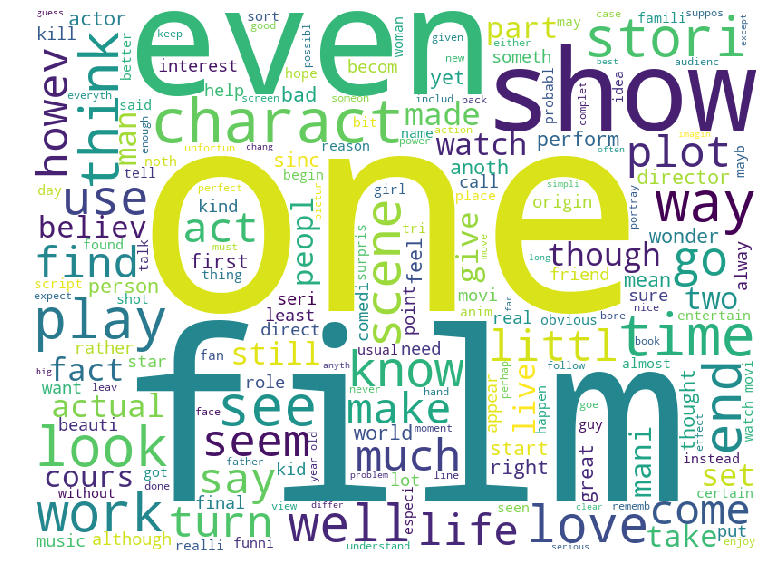

Wall time: 1min 29s


In [48]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))

In [50]:
clean_train_reviews

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl sta

In [56]:
# 단어 수
train['num_words'] = train['review_clean'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_uniq_words'] = train['review_clean'].apply(lambda x: len(set(str(x).split())))

In [59]:
clean_train_reviews[0].split()

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari',
 'watch',
 'wiz',
 'watch',
 'moonwalk',
 'mayb',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'realli',
 'cool',
 'eighti',
 'mayb',
 'make',
 'mind',
 'whether',
 'guilti',
 'innoc',
 'moonwalk',
 'part',
 'biographi',
 'part',
 'featur',
 'film',
 'rememb',
 'go',
 'see',
 'cinema',
 'origin',
 'releas',
 'subtl',
 'messag',
 'mj',
 'feel',
 'toward',
 'press',
 'also',
 'obvious',
 'messag',
 'drug',
 'bad',
 'kay',
 'visual',
 'impress',
 'cours',
 'michael',
 'jackson',
 'unless',
 'remot',
 'like',
 'mj',
 'anyway',
 'go',
 'hate',
 'find',
 'bore',
 'may',
 'call',
 'mj',
 'egotist',
 'consent',
 'make',
 'movi',
 'mj',
 'fan',
 'would',
 'say',
 'made',
 'fan',
 'true',
 'realli',
 'nice',
 'actual',
 'featur',
 'film',
 'bit',
 'final',
 'start',
 'minut',
 'exclud',
 'smooth',
 'crimin',
 'sequenc',
 'joe',
 'pesci',
 'convinc',
 'psychopath',
 'power',
 'drug

리뷰 별 단어 평균값 :  119.52356
리뷰 별 단어 중간값 : 89.0
리뷰 별 고유 단어 평균값 : 94.05756
리뷰 별 고유 단어 중간값 74.0


C:\Users\hyooo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hyooo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'distribution of uniq words')

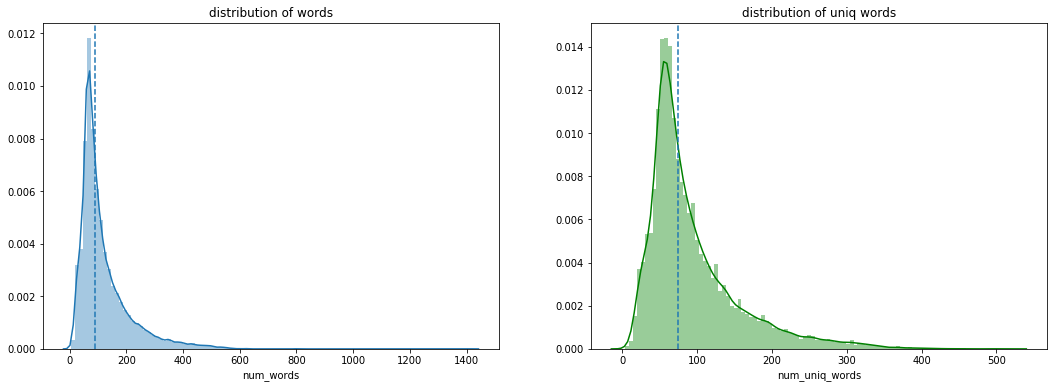

In [63]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰 별 단어 평균값 : ', train['num_words'].mean())
print('리뷰 별 단어 중간값 :', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('distribution of words')

print('리뷰 별 고유 단어 평균값 :', train['num_uniq_words'].mean())
print('리뷰 별 고유 단어 중간값', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('distribution of uniq words')

# Bag-of-words model - Wikipedia
## 피쳐생성
* 단어의 빈도수로 피쳐를 생성해 러신머닝 모델이 알아들을 수 있는 값으로 생성한다.

## 사이킷런의 CountVectorizer를 통해 피처 생성
* 정규표현식을 사용해 토큰을 추출한다.
* 모두 소문자로 변환시키기 때문에 good, Good, gOod이 모든 같은 특성이 된다.
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서의 나타난 토큰만을 사용한다.
* min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [34]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer=None,
                            preprocessor=None,
                            stop_words =None,
                            min_df =2, #토큰이 나타날 최소 문서 개수
                            ngram_range=(1,3),
                            max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
# 속도 개선을 위해 pipline을 사용한다.
# 참고 : https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [36]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

Wall time: 55 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

* 그냥 fit_transform 할 때보다 속도가 훨씬 빨리 끝난다.

In [37]:
train_data_features.shape

(25000, 20000)

In [38]:
vocab = vectorizer.get_feature_names()
vocab[:10]

['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [39]:
# 벡터화된 피처를 확인해 본다.
import numpy as np
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print(count, tag)

[[26 48 22 ... 59 40 23]] aag


In [40]:
pd.DataFrame(dist, columns=vocab)

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [41]:
pd.DataFrame(train_data_features[:100].toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest
* 랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 이 특징은 각 트리이 예측들이 비상관화(decorrelation)되게 하며, 결과적으로 일반화(generalization) 성능을 향상한다. 또한 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강인하게 만들어 준다. 

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1
)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
%time forest = forest.fit(train_data_features, train['sentiment'])

Wall time: 53.7 s


In [45]:
from sklearn.cross_validation import cross_val_score
%time np.mean(cross_val_score(forest, train_data_features, train['sentiment'], cv=10, scoring='roc_auc'))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Wall time: 8min 55s


0.9272997120000002

# Overfitting and Underfitting
* 과소적합(Underfitting) : 모델이 너무 가단해 데이터의 특징을 잡아내지 못했다.
* 과대적합(Overfitting) : 모델이 너무 복잡해 일반화가 어렵다

In [31]:
test['review_clean'] = test['review'].apply(review_to_words)
clean_test_reviews = []
for i in test['review_clean']:
    clean_test_reviews.append(i)

### Test의 새 피쳐들을 생성
* 위에서 학습된 vectorize를 활용함

In [47]:
test_data_features = pipeline.transform(clean_test_reviews)
print(type(test_data_features))
test_data_features = test_data_features.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [48]:
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
vocab[8], vocab[2558],  vocab[2560]

('abc', 'charact person', 'charact plot')

In [50]:
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [51]:
output = pd.DataFrame(data={'id': test['id'], 'sentiment':result})

In [52]:
output.to_csv('../output//tutorial_1_BOW_model.csv', index=False, quoting=3)

In [53]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

98


0    12549
1    12451
Name: sentiment, dtype: int64

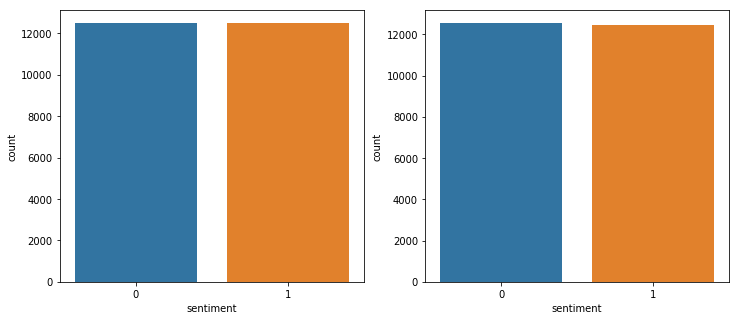

In [56]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])